# Library yang digunakan

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from IPython.display import HTML, display, Image

from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray
import cv2
import os
import random

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


from IPython.display import display
from ipywidgets import FileUpload, Button, Output
from PIL import Image
import numpy as np

# Data Understanding

In [4]:
Categories = ['Mentah', 'Matang', 'Busuk','apel']
datadir = 'E:\\flog'

In [5]:
all = 0

for i in Categories:
    path = os.path.join(datadir, i)
    print(f"Total {i} = ", len(os.listdir(path)))
    all += len(os.listdir(path))
    
print("Total Seluruh Data :", all)

NameError: name 'os' is not defined

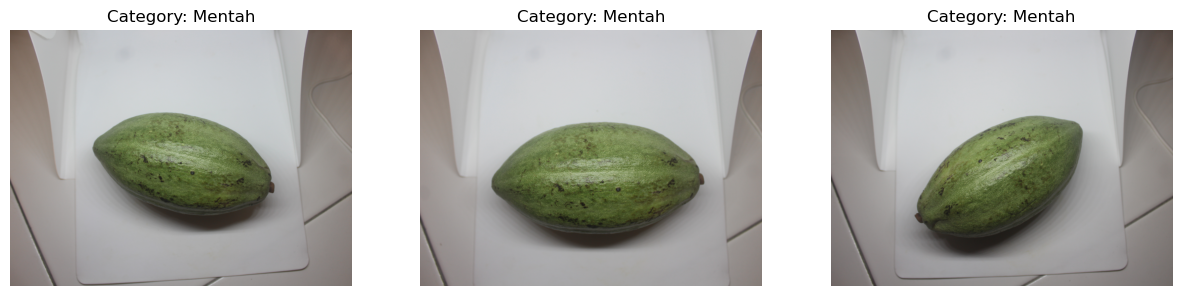

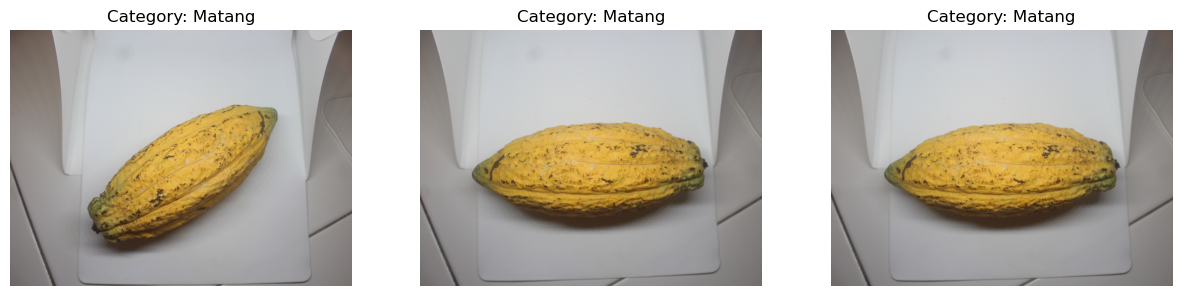

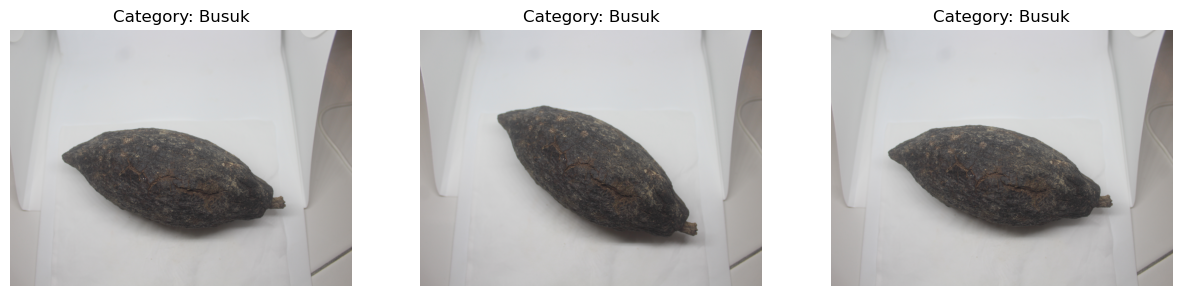

In [22]:
for i in Categories:
    path = os.path.join(datadir, i)
    all_images = os.listdir(path)
    random_images = random.sample(all_images, 3)  # Memilih 3 gambar acak dari kategori

    plt.figure(figsize=(15, 5))  # Ukuran gambar untuk menampung 3 gambar secara horizontal

    for idx, img in enumerate(random_images):
        img_array = cv2.imread(os.path.join(path, img))
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Mengubah BGR ke RGB agar sesuai dengan plt.imshow
        plt.subplot(1, 3, idx + 1)  # Menyiapkan subplot dengan 1 baris dan 3 kolom
        plt.imshow(img_rgb)
        plt.title(f'Category: {i}')
        plt.axis('off')  # Menyembunyikan axis
    
    plt.show()

# Data Processing 

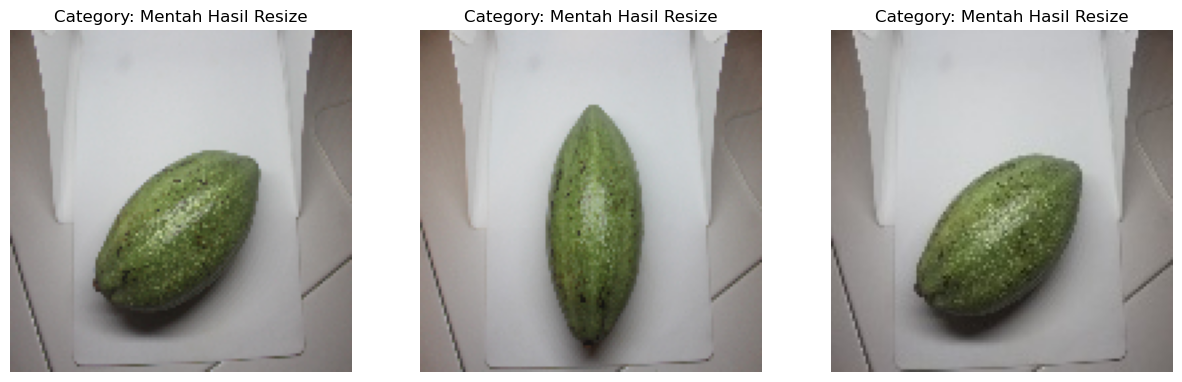

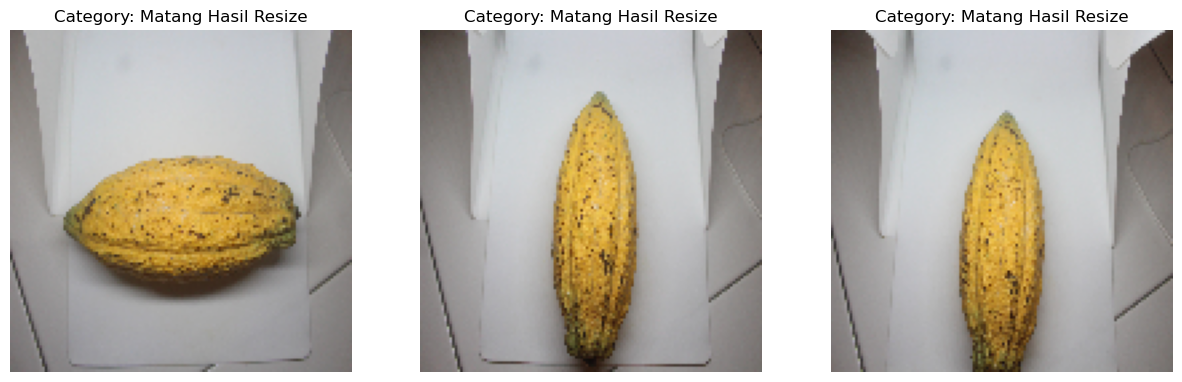

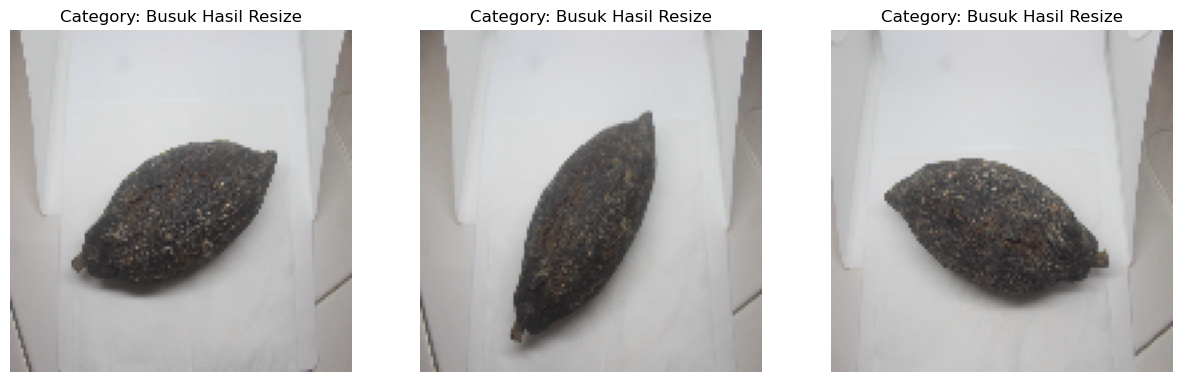

In [23]:
for i in Categories:
    path = os.path.join(datadir, i)
    all_images = os.listdir(path)
    random_images = random.sample(all_images, 3)  # Memilih 3 gambar acak dari kategori

    plt.figure(figsize=(15, 5))  # Ukuran gambar untuk menampung 3 gambar secara horizontal

    for idx, img in enumerate(random_images):
        img_array = cv2.imread(os.path.join(path, img))
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Mengubah BGR ke RGB agar sesuai dengan plt.imshow
        img_resized = cv2.resize(img_rgb , (128, 128))
        
        # Menambahkan kode untuk menyimpan hasil resize ke folder 'resized' sesuai kategori
        save_folder = os.path.join(datadir, 'resized', i)
        os.makedirs(save_folder, exist_ok=True)  # Membuat folder jika belum ada
        save_path = os.path.join(save_folder, f'resized_{img}')
        cv2.imwrite(save_path, cv2.cvtColor(img_resized, cv2.COLOR_RGB2BGR))  # Simpan dalam format BGR
        
        plt.subplot(1, 3, idx + 1)  # Menyiapkan subplot dengan 1 baris dan 3 kolom
        plt.imshow(img_resized)
        plt.title(f'Category: {i} Hasil Resize')
        plt.axis('off')  # Menyembunyikan axis
    
    plt.show()

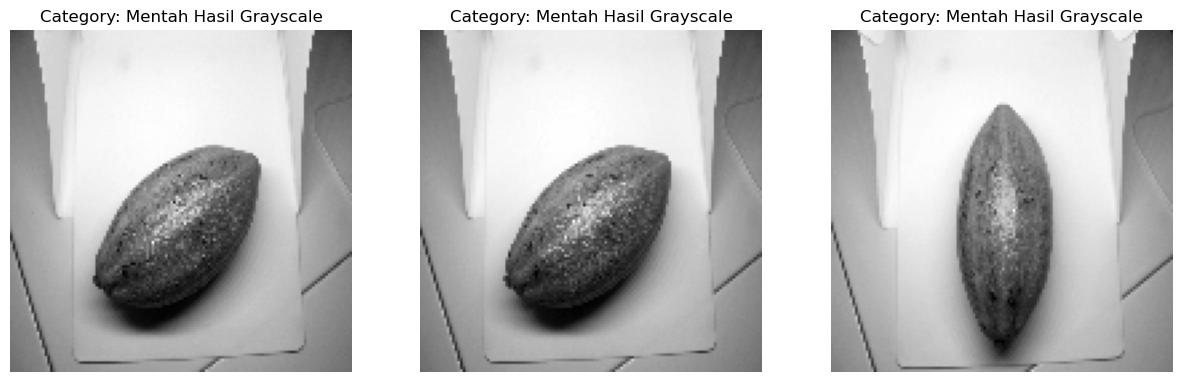

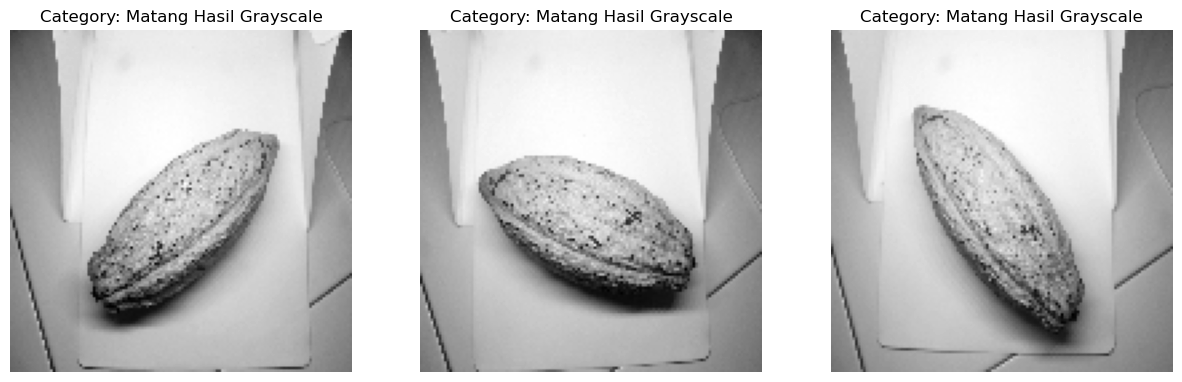

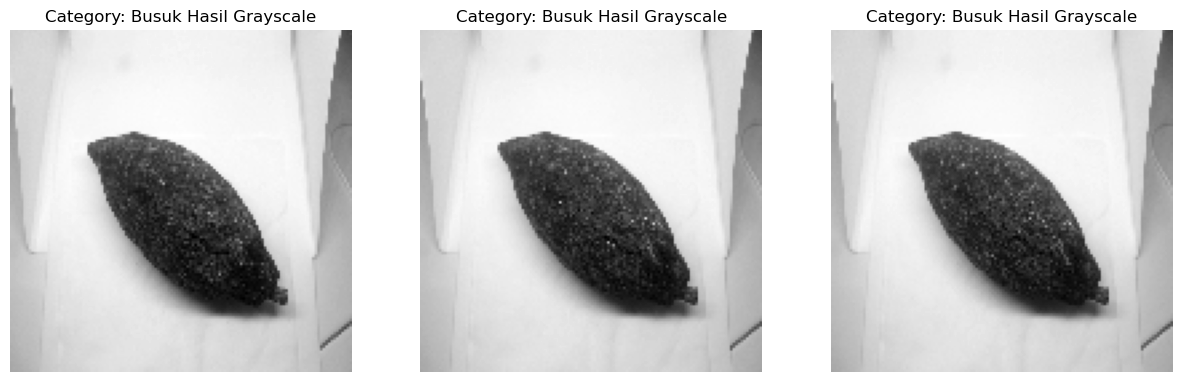

In [24]:
for i in Categories:
    path = os.path.join(datadir, i)
    all_images = os.listdir(path)
    random_images = random.sample(all_images, 3)  # Memilih 3 gambar acak dari kategori

    plt.figure(figsize=(15, 5))  # Ukuran gambar untuk menampung 3 gambar secara horizontal

    for idx, img in enumerate(random_images):
        img_array = cv2.imread(os.path.join(path, img))
        img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # Mengubah gambar menjadi grayscale
        img_resized = cv2.resize(img_gray, (128, 128))  # Ubah ukuran gambar menjadi 128x128
        plt.subplot(1, 3, idx + 1)  # Menyiapkan subplot dengan 1 baris dan 3 kolom
        plt.imshow(img_resized, cmap='gray')  # Menampilkan gambar grayscale dengan colormap 'gray'
        plt.title(f'Category: {i} Hasil Grayscale')
        plt.axis('off')  # Menyembunyikan axis
    
    plt.show()

In [25]:
Categories=['Mentah','Matang','Busuk']
flat_data_arr=[]
target_arr=[]
datadir='E:\\Dataset'

for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))  # Membaca gambar menggunakan OpenCV
        img_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # Mengubah gambar menjadi grayscale
        img_resized = cv2.resize(img_gray, (128, 128))  # Mengubah ukuran gambar menjadi 128x128
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
    print("\n")

loading... category : Mentah
loaded category:Mentah successfully


loading... category : Matang
loaded category:Matang successfully


loading... category : Busuk
loaded category:Busuk successfully




In [26]:
df = pd.DataFrame(np.array(flat_data_arr)) #dataframe
df['Target'] = np.array(target_arr)

df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Target
0,105,104,107,125,181,181,184,184,185,185,...,136,136,136,134,132,131,130,130,128,0
1,105,104,105,110,189,183,184,184,185,185,...,136,135,135,133,133,129,130,129,128,0
2,105,104,107,110,190,183,183,183,185,185,...,138,135,135,132,133,129,128,128,128,0
3,103,105,106,109,165,183,184,185,185,185,...,136,135,134,135,132,130,128,130,126,0
4,103,104,107,107,113,183,183,185,184,186,...,136,134,135,134,131,132,129,129,127,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,124,124,131,194,191,194,194,196,195,195,...,149,149,147,147,145,144,145,141,141,2
674,122,124,130,195,192,194,195,195,195,195,...,150,149,148,146,146,145,143,143,141,2
675,193,193,195,197,194,197,198,187,187,188,...,162,164,162,160,158,158,158,157,156,2
676,125,121,126,129,156,195,197,195,195,195,...,153,151,152,151,149,146,145,144,145,2


In [27]:
df_scale = df.iloc[:,:-1]/255.0 #ektraksi grayscale
df_scale

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.411765,0.407843,0.419608,0.490196,0.709804,0.709804,0.721569,0.721569,0.725490,0.725490,...,0.545098,0.533333,0.533333,0.533333,0.525490,0.517647,0.513725,0.509804,0.509804,0.501961
1,0.411765,0.407843,0.411765,0.431373,0.741176,0.717647,0.721569,0.721569,0.725490,0.725490,...,0.529412,0.533333,0.529412,0.529412,0.521569,0.521569,0.505882,0.509804,0.505882,0.501961
2,0.411765,0.407843,0.419608,0.431373,0.745098,0.717647,0.717647,0.717647,0.725490,0.725490,...,0.545098,0.541176,0.529412,0.529412,0.517647,0.521569,0.505882,0.501961,0.501961,0.501961
3,0.403922,0.411765,0.415686,0.427451,0.647059,0.717647,0.721569,0.725490,0.725490,0.725490,...,0.537255,0.533333,0.529412,0.525490,0.529412,0.517647,0.509804,0.501961,0.509804,0.494118
4,0.403922,0.407843,0.419608,0.419608,0.443137,0.717647,0.717647,0.725490,0.721569,0.729412,...,0.541176,0.533333,0.525490,0.529412,0.525490,0.513725,0.517647,0.505882,0.505882,0.498039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.486275,0.486275,0.513725,0.760784,0.749020,0.760784,0.760784,0.768627,0.764706,0.764706,...,0.588235,0.584314,0.584314,0.576471,0.576471,0.568627,0.564706,0.568627,0.552941,0.552941
674,0.478431,0.486275,0.509804,0.764706,0.752941,0.760784,0.764706,0.764706,0.764706,0.764706,...,0.596078,0.588235,0.584314,0.580392,0.572549,0.572549,0.568627,0.560784,0.560784,0.552941
675,0.756863,0.756863,0.764706,0.772549,0.760784,0.772549,0.776471,0.733333,0.733333,0.737255,...,0.635294,0.635294,0.643137,0.635294,0.627451,0.619608,0.619608,0.619608,0.615686,0.611765
676,0.490196,0.474510,0.494118,0.505882,0.611765,0.764706,0.772549,0.764706,0.764706,0.764706,...,0.588235,0.600000,0.592157,0.596078,0.592157,0.584314,0.572549,0.568627,0.564706,0.568627


In [ ]:
df_scale.to_excel('Hasil_scale.xlsx')

In [28]:
X = df_scale
y = df.iloc[:,-1]

In [29]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.5, random_state = 42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size = 0.4, random_state = 42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [30]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Data split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate total data per class
def calculate_class_totals(y):
    counter = Counter(y)
    totals = {0: 0, 1: 0, 2: 0}  # Ensure all classes (0, 1, 2) are included
    for key, value in counter.items():
        totals[key] = value
    return totals

# Calculate totals for each split
totals = {
    "Split 50:50": {
        "Train": calculate_class_totals(y_train1),
        "Test": calculate_class_totals(y_test1)
    },
    "Split 60:40": {
        "Train": calculate_class_totals(y_train2),
        "Test": calculate_class_totals(y_test2)
    },
    "Split 70:30": {
        "Train": calculate_class_totals(y_train3),
        "Test": calculate_class_totals(y_test3)
    },
}

# Display totals
for split, data in totals.items():
    print(f"{split}:")
    for dataset, total in data.items():
        print(f"  {dataset} totals:")
        print(f"    Mentah (0): {total[0]}")
        print(f"    Matang (1): {total[1]}")
        print(f"    Busuk (2): {total[2]}")

Split 50:50:
  Train totals:
    Mentah (0): 103
    Matang (1): 113
    Busuk (2): 123
  Test totals:
    Mentah (0): 125
    Matang (1): 105
    Busuk (2): 109
Split 60:40:
  Train totals:
    Mentah (0): 126
    Matang (1): 136
    Busuk (2): 144
  Test totals:
    Mentah (0): 102
    Matang (1): 82
    Busuk (2): 88
Split 70:30:
  Train totals:
    Mentah (0): 152
    Matang (1): 156
    Busuk (2): 166
  Test totals:
    Mentah (0): 76
    Matang (1): 62
    Busuk (2): 66


In [31]:
y_test2.value_counts()

Target
0    102
2     88
1     82
Name: count, dtype: int64

In [32]:
X_train1

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
322,0.372549,0.368627,0.372549,0.384314,0.709804,0.701961,0.705882,0.705882,0.717647,0.709804,...,0.454902,0.462745,0.454902,0.447059,0.443137,0.439216,0.443137,0.435294,0.431373,0.419608
255,0.368627,0.368627,0.372549,0.384314,0.392157,0.737255,0.709804,0.709804,0.713725,0.721569,...,0.474510,0.466667,0.462745,0.466667,0.458824,0.454902,0.447059,0.454902,0.435294,0.435294
563,0.352941,0.356863,0.376471,0.356863,0.360784,0.380392,0.388235,0.400000,0.419608,0.415686,...,0.549020,0.545098,0.549020,0.537255,0.541176,0.537255,0.533333,0.529412,0.521569,0.505882
649,0.482353,0.490196,0.494118,0.513725,0.768627,0.760784,0.756863,0.760784,0.768627,0.764706,...,0.592157,0.592157,0.592157,0.596078,0.588235,0.580392,0.576471,0.568627,0.560784,0.564706
190,0.286275,0.298039,0.313725,0.317647,0.321569,0.313725,0.333333,0.349020,0.745098,0.709804,...,0.470588,0.466667,0.462745,0.447059,0.450980,0.447059,0.439216,0.443137,0.439216,0.427451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.329412,0.341176,0.349020,0.364706,0.392157,0.396078,0.427451,0.635294,0.760784,0.776471,...,0.494118,0.486275,0.478431,0.478431,0.478431,0.470588,0.474510,0.466667,0.454902,0.450980
106,0.301961,0.298039,0.298039,0.313725,0.325490,0.337255,0.352941,0.360784,0.384314,0.392157,...,0.486275,0.474510,0.466667,0.478431,0.470588,0.462745,0.458824,0.454902,0.447059,0.443137
270,0.349020,0.349020,0.360784,0.380392,0.733333,0.713725,0.717647,0.717647,0.717647,0.686275,...,0.474510,0.474510,0.474510,0.462745,0.458824,0.458824,0.447059,0.443137,0.439216,0.435294
435,0.290196,0.305882,0.301961,0.313725,0.317647,0.325490,0.329412,0.341176,0.356863,0.360784,...,0.494118,0.498039,0.482353,0.478431,0.474510,0.482353,0.470588,0.474510,0.458824,0.450980


In [33]:
X_train2

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
296,0.325490,0.333333,0.337255,0.333333,0.717647,0.701961,0.643137,0.713725,0.764706,0.756863,...,0.470588,0.466667,0.462745,0.462745,0.458824,0.458824,0.435294,0.439216,0.443137,0.431373
306,0.356863,0.364706,0.384314,0.517647,0.690196,0.694118,0.701961,0.701961,0.701961,0.705882,...,0.454902,0.458824,0.443137,0.439216,0.439216,0.435294,0.431373,0.427451,0.427451,0.423529
420,0.301961,0.294118,0.309804,0.317647,0.333333,0.341176,0.352941,0.356863,0.368627,0.364706,...,0.494118,0.486275,0.478431,0.478431,0.478431,0.478431,0.478431,0.466667,0.462745,0.454902
144,0.243137,0.254902,0.266667,0.262745,0.278431,0.282353,0.298039,0.309804,0.305882,0.317647,...,0.454902,0.447059,0.443137,0.447059,0.435294,0.423529,0.423529,0.427451,0.411765,0.411765
404,0.309804,0.317647,0.321569,0.337255,0.341176,0.349020,0.364706,0.364706,0.380392,0.372549,...,0.498039,0.482353,0.478431,0.482353,0.478431,0.474510,0.474510,0.466667,0.458824,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.329412,0.341176,0.349020,0.364706,0.392157,0.396078,0.427451,0.635294,0.760784,0.776471,...,0.494118,0.486275,0.478431,0.478431,0.478431,0.470588,0.474510,0.466667,0.454902,0.450980
106,0.301961,0.298039,0.298039,0.313725,0.325490,0.337255,0.352941,0.360784,0.384314,0.392157,...,0.486275,0.474510,0.466667,0.478431,0.470588,0.462745,0.458824,0.454902,0.447059,0.443137
270,0.349020,0.349020,0.360784,0.380392,0.733333,0.713725,0.717647,0.717647,0.717647,0.686275,...,0.474510,0.474510,0.474510,0.462745,0.458824,0.458824,0.447059,0.443137,0.439216,0.435294
435,0.290196,0.305882,0.301961,0.313725,0.317647,0.325490,0.329412,0.341176,0.356863,0.360784,...,0.494118,0.498039,0.482353,0.478431,0.474510,0.482353,0.470588,0.474510,0.458824,0.450980


In [34]:
X_train3

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
83,0.305882,0.317647,0.333333,0.333333,0.341176,0.341176,0.352941,0.368627,0.384314,0.392157,...,0.486275,0.486275,0.486275,0.474510,0.462745,0.466667,0.458824,0.458824,0.450980,0.447059
431,0.282353,0.301961,0.305882,0.313725,0.313725,0.325490,0.337255,0.341176,0.349020,0.352941,...,0.498039,0.498039,0.486275,0.486275,0.482353,0.478431,0.470588,0.466667,0.466667,0.450980
338,0.215686,0.215686,0.227451,0.239216,0.231373,0.235294,0.247059,0.250980,0.250980,0.258824,...,0.486275,0.486275,0.466667,0.462745,0.462745,0.462745,0.447059,0.443137,0.447059,0.435294
437,0.282353,0.301961,0.305882,0.298039,0.317647,0.325490,0.337255,0.345098,0.356863,0.356863,...,0.498039,0.498039,0.478431,0.490196,0.482353,0.466667,0.466667,0.462745,0.458824,0.450980
79,0.317647,0.317647,0.329412,0.341176,0.352941,0.360784,0.364706,0.376471,0.380392,0.392157,...,0.486275,0.490196,0.482353,0.478431,0.470588,0.470588,0.466667,0.466667,0.454902,0.454902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.329412,0.341176,0.349020,0.364706,0.392157,0.396078,0.427451,0.635294,0.760784,0.776471,...,0.494118,0.486275,0.478431,0.478431,0.478431,0.470588,0.474510,0.466667,0.454902,0.450980
106,0.301961,0.298039,0.298039,0.313725,0.325490,0.337255,0.352941,0.360784,0.384314,0.392157,...,0.486275,0.474510,0.466667,0.478431,0.470588,0.462745,0.458824,0.454902,0.447059,0.443137
270,0.349020,0.349020,0.360784,0.380392,0.733333,0.713725,0.717647,0.717647,0.717647,0.686275,...,0.474510,0.474510,0.474510,0.462745,0.458824,0.458824,0.447059,0.443137,0.439216,0.435294
435,0.290196,0.305882,0.301961,0.313725,0.317647,0.325490,0.329412,0.341176,0.356863,0.360784,...,0.494118,0.498039,0.482353,0.478431,0.474510,0.482353,0.470588,0.474510,0.458824,0.450980


In [ ]:
X_train1.to_excel('Train1.xlsx')
X_train2.to_excel('Train2.xlsx')
X_train3.to_excel('Train3.xlsx')

In [35]:
model_uji1 = SVC(kernel='rbf',C= 1, gamma= 0.01)
model_uji2 = SVC(kernel='rbf',C= 10, gamma= 1)
model_uji3 = SVC(kernel='rbf',C= 10, gamma= 0.0001)

In [36]:
display(HTML("<h4>Pembentukan dan Pelatihan Model1 "))
display(model_uji1.fit(X_train1, y_train1))

display(HTML("<h4>Pembentukan dan Pelatihan Model2"))
display(model_uji2.fit(X_train2, y_train2))

display(HTML("<h4>Pembentukan dan Pelatihan Model3"))
display(model_uji3.fit(X_train3, y_train3))

SVC(C=1, gamma=0.01)

SVC(C=10, gamma=1)

SVC(C=10, gamma=0.0001)

In [40]:
hasil1=model_uji1.predict(X_test1)
hasil2=model_uji2.predict(X_test2)
hasil3=model_uji3.predict(X_test3)

,Aktual,Prediksi
0,2,2
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
334,1,1
335,0,0
336,1,1
337,0,0


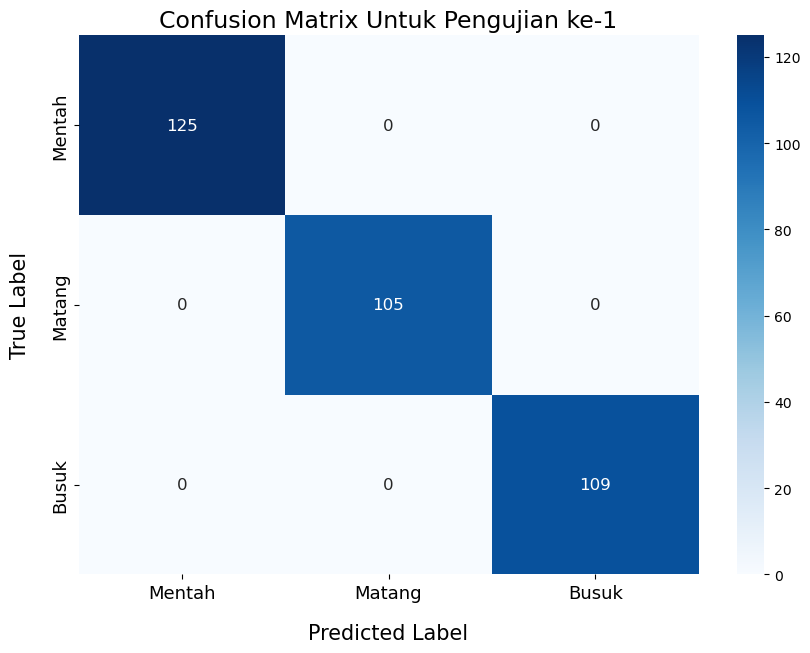

Accuracy   : 100.0 %
Precission : 100.0 %
Recall     : 100.0 %
F1-Score   : 100.0 %


In [50]:
# Membuat confusion matrix
labels = ['Mentah','Matang','Busuk']
cm1 = confusion_matrix(y_test1, hasil1)

display(HTML("<h3>Perbandingan Hasil Aktual dengan Sebenarnya Pengujian 1"))
evaluasi1 = pd.DataFrame([np.array(y_test1), hasil1]).T
evaluasi1.rename(columns={0: 'Aktual', 1: 'Prediksi'}, inplace = True)
display(evaluasi1)

# Visualisasi confusion matrix dengan seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('Predicted Label', labelpad = 15, fontsize=15)
plt.ylabel('True Label', labelpad = 15, fontsize=15)
plt.title('Confusion Matrix Untuk Pengujian ke-1', fontsize = 17) 


# Menampilkan plot
plt.show()

_accuracy   = round(accuracy_score(y_test1, hasil1)*100,2)
_precission = round(precision_score(y_test1, hasil1, average='micro')*100,2)
_recall     = round(recall_score(y_test1, hasil1, average='micro')*100,2)
_fscore     = round(f1_score(y_test1, hasil1, average='micro')*100,2)

print('Accuracy   :', _accuracy, '%')
print('Precission :', _precission, '%')
print('Recall     :', _recall, '%')
print('F1-Score   :', _fscore, '%')

,Aktual,Prediksi
0,2,2
1,1,2
2,0,2
3,1,2
4,0,0
...,...,...
267,2,2
268,2,2
269,1,2
270,0,2


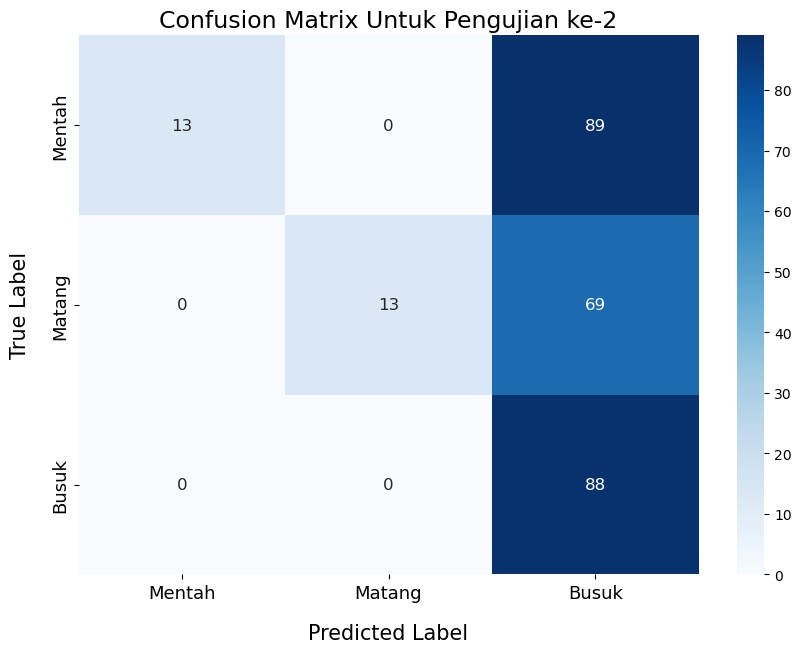

Accuracy   : 41.91 %
Precission : 41.91 %
Recall     : 41.91 %
F1-Score   : 41.91 %


In [51]:
# Membuat confusion matrix
labels = ['Mentah','Matang','Busuk']
cm2 = confusion_matrix(y_test2, hasil2)

display(HTML("<h3>Perbandingan Hasil Aktual dengan Sebenarnya Pengujian 2"))
evaluasi2 = pd.DataFrame([np.array(y_test2), hasil2]).T
evaluasi2.rename(columns={0: 'Aktual', 1: 'Prediksi'}, inplace = True)
display(evaluasi2)

# Visualisasi confusion matrix dengan seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('Predicted Label', labelpad = 15, fontsize=15)
plt.ylabel('True Label', labelpad = 15, fontsize=15)
plt.title('Confusion Matrix Untuk Pengujian ke-2', fontsize = 17)

# Menampilkan plot
plt.show()

_accuracy   = round(accuracy_score(y_test2, hasil2)*100,2)
_precission = round(precision_score(y_test2, hasil2, average='micro')*100,2)
_recall     = round(recall_score(y_test2, hasil2, average='micro')*100,2)
_fscore     = round(f1_score(y_test2, hasil2, average='micro')*100,2)

print('Accuracy   :', _accuracy, '%')
print('Precission :', _precission, '%')
print('Recall     :', _recall, '%')
print('F1-Score   :', _fscore, '%')

,Aktual,Prediksi
0,2,2
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
199,2,2
200,2,2
201,0,0
202,2,2


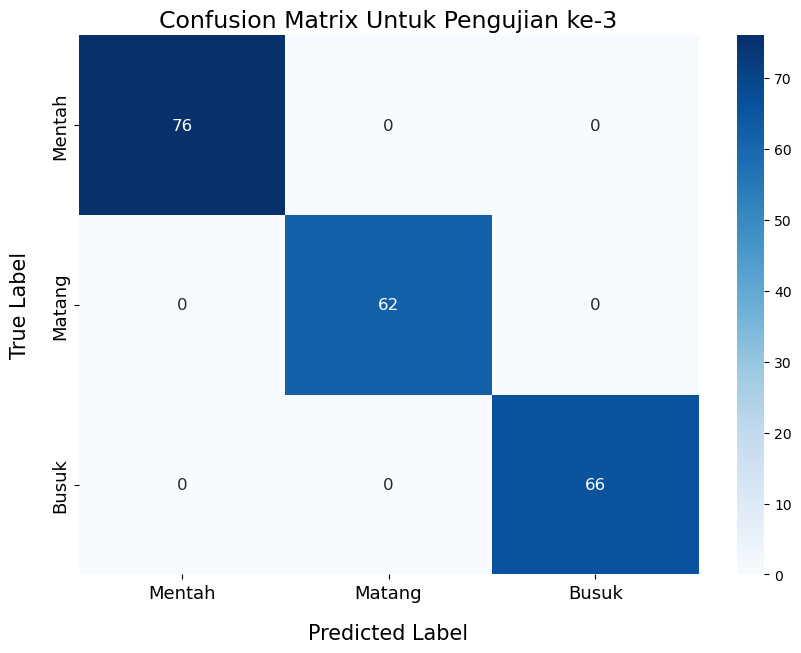

Accuracy   : 100.0 %
Precission : 100.0 %
Recall     : 100.0 %
F1-Score   : 100.0 %


In [52]:
# Membuat confusion matrix
labels = ['Mentah','Matang','Busuk']
cm3 = confusion_matrix(y_test3, hasil3)

display(HTML("<h3>Perbandingan Hasil Aktual dengan Sebenarnya Pengujian 3"))
evaluasi3 = pd.DataFrame([np.array(y_test3), hasil3]).T
evaluasi3.rename(columns={0: 'Aktual', 1: 'Prediksi'}, inplace = True)
display(evaluasi3)


# Visualisasi confusion matrix dengan seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.xlabel('Predicted Label', labelpad = 15, fontsize=15)
plt.ylabel('True Label', labelpad = 15, fontsize=15)
plt.title('Confusion Matrix Untuk Pengujian ke-3', fontsize = 17)

# Menampilkan plot
plt.show()

_accuracy   = round(accuracy_score(y_test3, hasil3)*100,2)
_precission = round(precision_score(y_test3, hasil3, average='micro')*100,2)
_recall     = round(recall_score(y_test3, hasil3, average='micro')*100,2)
_fscore     = round(f1_score(y_test3, hasil3, average='micro')*100,2)

print('Accuracy   :', _accuracy, '%')
print('Precission :', _precission, '%')
print('Recall     :', _recall, '%')
print('F1-Score   :', _fscore, '%')

# Prediksi Model

In [48]:
display(HTML("<h3>Proses Prediksi Model1 Sedang Berlangsung..."))
hasil1 = model_uji1.predict(X_test1)
display(hasil1[0:10])
display(HTML("<h4>Proses Prediksi Model1 Selesai"))

display(HTML("<h3>Proses Prediksi Model2 Sedang Berlangsung..."))
hasil2 = model_uji2.predict(X_test2)
display(hasil2[0:10])
display(HTML("<h4>Proses Prediksi Model2 Selesai"))

display(HTML("<h3>Proses Prediksi Model3 Sedang Berlangsung..."))
hasil3 = model_uji3.predict(X_test3)
display(hasil3[0:10])
display(HTML("<h4>Proses Prediksi Model3 Selesai"))

array([2, 1, 0, 1, 0, 1, 1, 0, 2, 1])

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1])

array([2, 1, 0, 1, 0, 1, 1, 0, 2, 1])

# Evaluasi Model

In [ ]:
import joblib
joblib.dump(model_uji1, 'svm_model1.pkl')
joblib.dump(model_uji2, 'svm_model2.pkl')
joblib.dump(model_uji3, 'svm_model3.pkl')